# Random Notes

Given that the MacLaurin Series for $e^{x}$ is given by
$$
e^{x} = \sum_{n=0}^{\infty} \frac{x^{n}}{n!} ,\quad \forall x
$$
then when $x = 1$ we have the approximation for $e$, as
$$
e = \sum_{n=0}^{\infty} \frac{1}{n!} 
$$

In [2]:
import numpy as np
import math

n = 100 #number of iterations
e_approx = 0
for i in range(n):
    e_approx += 1/math.factorial(i)
print(e_approx)
error = abs(np.e - e_approx)
print(error)

2.7182818284590455
4.440892098500626e-16


Regarding Stirling's approximation, we have that
$$
n! \sim \sqrt{2\pi n}\left(\frac{n}{e}\right)^{n}
$$
such that as $n \rightarrow \infty$, $\frac{n!}{\sqrt{2\pi n}\left(\frac{n}{e}\right)^{n}} \simeq 1$. 

In [11]:
n = 5

def n_fac_approx(n):
    return np.sqrt(2*np.pi*n)*(n/np.e)**n

print(n_fac_approx(n))
error = abs(math.factorial(n) - n_fac_approx(n))
print(error)

118.0191679575901
1.9808320424099009


An approximation for $\pi$ can be given by the expression
$$
\frac{\pi^{2}}{6} = \sum_{n = 1}^{\infty} \frac{1}{n^{2}}
$$
such that
$$
\pi = \sqrt{6\sum_{n = 1}^{\infty} \frac{1}{n^{2}}}
$$

In [17]:
n = 2000 #number of iterations

def pi_approx(n):
    pi_approx_val = 0
    for i in range(1,n+1):
        pi_approx_val += 1/i**2
    return np.sqrt(6*pi_approx_val)
print(pi_approx(n))
error = abs(np.pi - pi_approx(n))
print(error)

3.1411152718364823
0.00047738175331080157


Given that the average of a function can be stated as
$$
\langle f(x) \rangle = \frac{1}{b-a} \int_{a}^{b} f(x)dx
$$
we'll have
$$
(b-a) \langle f(x) \rangle = \int_{a}^{b} f(x)dx
$$
such that
$$
\frac{b-a}{N}\sum_{i}f(x_{i}) \approx \int_{a}^{b} f(x)dx
$$
by taking $N$ points, between the interval $a$ and $b$, and evaluating $f$ at each $i^{th}$, leading to an approximation of the integral.

In [28]:
import numpy as np
from scipy.integrate import quad
import random
# Lets try for the function x^2, and bounds a = 2 to b = 50
a = 2
b = 50
N = 1000 # number of points
def approx(N,a,b):
    value = 0
    for i in range(N):
        point = random.uniform(a,b)
        value += point**2
    return (b-a)/N * value
print(approx(N,a,b))
def integrand(x):
    return x**2

print(quad(integrand,a,b)) # Anyway need more points for better approximation wrt this integration

41618.85110823132
(41664.0, 4.625633209798252e-10)


Regarding the spectral densitity of eletromagnetic radiation emitted by a black body, we have Rayleigh-Jean's law given by
$$
f_{1}(\lambda) = \frac{8\pi k T}{\lambda^{4}}
$$
and Planck's law given by
$$
f_{2}(\lambda) = \frac{8\pi h c \lambda^{-5}}{e^{hc/(\lambda kT)} - 1}
$$
For $\lambda \rightarrow \infty$ we can develop the Taylor series for $f_{2}$ such that $f_{2} \approx f_{1}$.

In that case $x = \frac{hc}{\lambda kT}$, and $f_{2}$ will become
$$
f_{2}(\lambda) = \frac{8\pi h c \lambda^{-5}}{(1 + (hc/(\lambda kT)) + \frac{(hc/(\lambda kT))^{2}}{2} + \frac{(hc/(\lambda kT))^{3}}{6} + ...) - 1}
$$
Given that $\lambda \rightarrow \infty$ perhaps we can assume that only the first and second terms of that expansion matter, such that we have
$$
f_{2}(\lambda) = \frac{8\pi h c \lambda^{-5}}{hc/(\lambda kT)}
$$
with this simplifying to 
$$
f_{2}(\lambda) = \frac{8\pi h c \lambda^{-5}}{hc/(\lambda kT)} = \frac{8\pi k T}{\lambda^{4}} = f_{1}(\lambda)
$$

Lets now play around and compare both expressions.

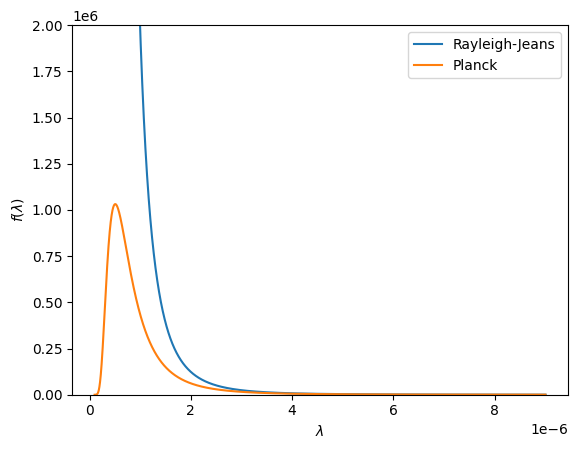

In [41]:
import numpy as np
import matplotlib.pyplot as plt
#All in SI units
h = 6.62e-34
c = 3.00e8
k = 1.38e-23
T = 5700
lamb = np.arange(1e-7,9e-6,1e-10) # Going for the micrometer range
def rayleigh_jeans(k,T,lamb):
    return (8*np.pi*k*T)/(lamb**4)

def planck(h,c,k,T,lamb):
    return (8*np.pi*h*c)/(lamb**5 * (-1 + np.e**((h*c)/(lamb*k*T))))

plt.plot(lamb, rayleigh_jeans(k,T,lamb), label='Rayleigh-Jeans')
plt.plot(lamb, planck(h,c,k,T,lamb), label='Planck')
ax = plt.gca()
ax.set_ylim(0, 2e6)
plt.xlabel('$\lambda$')
plt.ylabel('$f(\lambda)$')
plt.legend()

plt.show()
